# Preamble

importing

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs

from plot_utils import plot_probabilities


Making test data

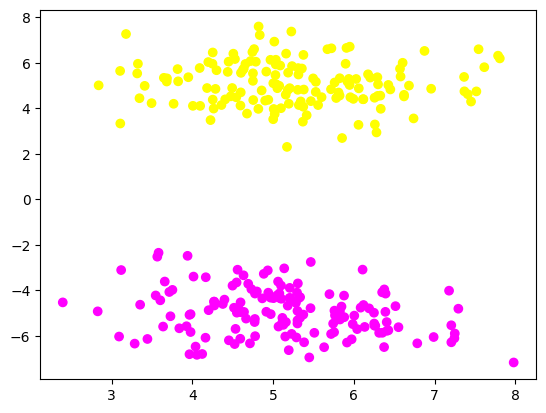

In [2]:
centers_full=[[-5, 0], [5, 5], [5, -5]]
colors_full = ["green", "yellow", "magenta"]
blobs = make_blobs(centers=centers_full[1:], cluster_std= 1, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(colors_full[1:])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=504)


# Fitting Logistic Regression

Creating and fitting on the training data.

In [4]:
from sklearn.svm import SVC

svm_class = SVC(probability=True, kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=504)

The position in the center is predicted as yellow...

In [5]:
svm_class.predict([[5, 0]])

array([1])

... but only with 50.6% certainty.

In [6]:
svm_class.predict_proba([[5, 0]])


array([[0.46601798, 0.53398202]])

In [7]:
svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(1.0, 1.0)

This plot shows the areas of uncertainty. Note, that most of the points are in either the 1.0 or the 0.0 area.

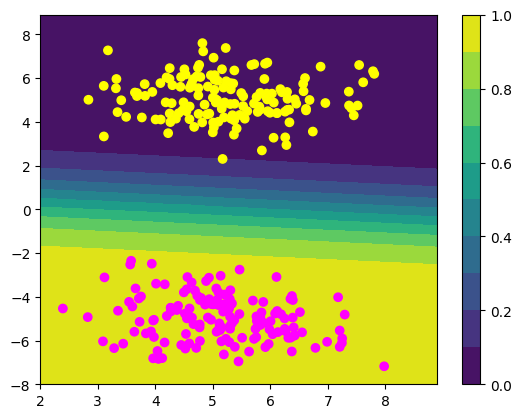

In [8]:
plot_probabilities(svm_class, X, y, colors)


# With overlap

Let's see how this works in a noisier example with more overlap between the categories

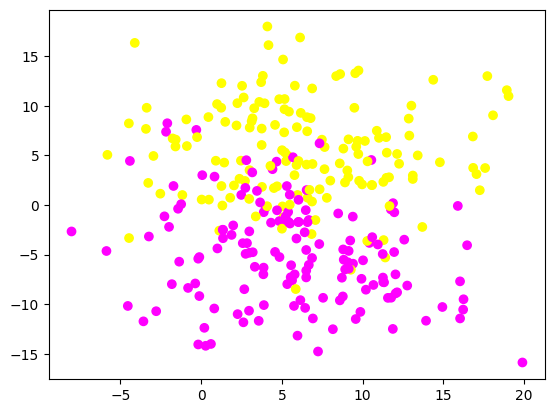

In [9]:
blobs = make_blobs(centers=centers_full[1:], cluster_std= 5, n_samples=300, random_state=504)

X, y = blobs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=504)

colors = ListedColormap(colors_full[1:])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [10]:
svm_class = SVC(probability=True, kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=504)

In [11]:
svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.8444444444444444, 0.84)

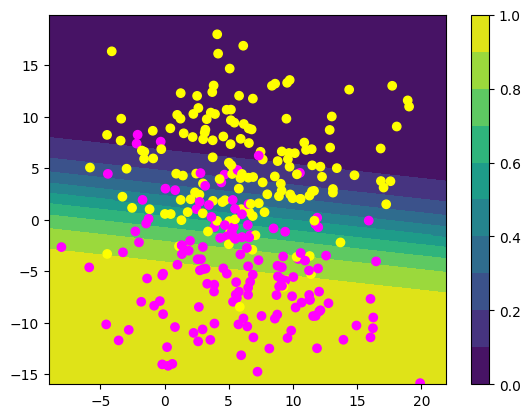

In [12]:
plot_probabilities(svm_class, X, y, colors)


# Mutiple categories



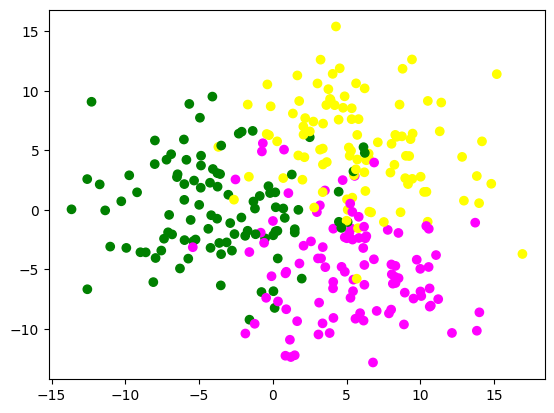

In [13]:
blobs = make_blobs(centers=centers_full, cluster_std= 4, n_samples=300, random_state=504)

X, y = blobs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

colors = ListedColormap(colors_full)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [14]:
svm_class = SVC(probability=True, decision_function_shape='ovr', kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.8577777777777778, 0.8133333333333334)

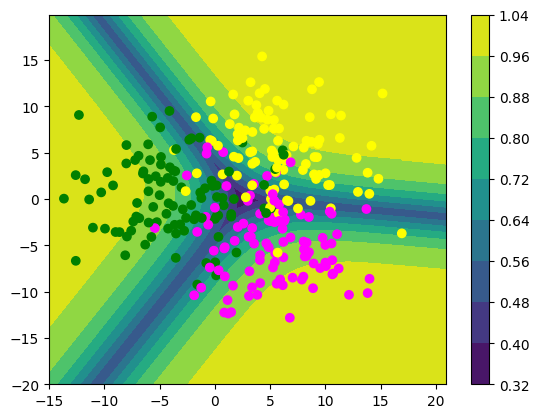

In [15]:
xx, yy = np.meshgrid(np.arange(-15, 21, .1), np.arange(-20, 20, .1))
Z = np.array([max(p) for p in svm_class.predict_proba(np.c_[xx.ravel(), yy.ravel()])])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap = 'viridis', levels = 10)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

# Non-linear data

This shouldn't be possible. Let's see how bad it is.

First some datasets.

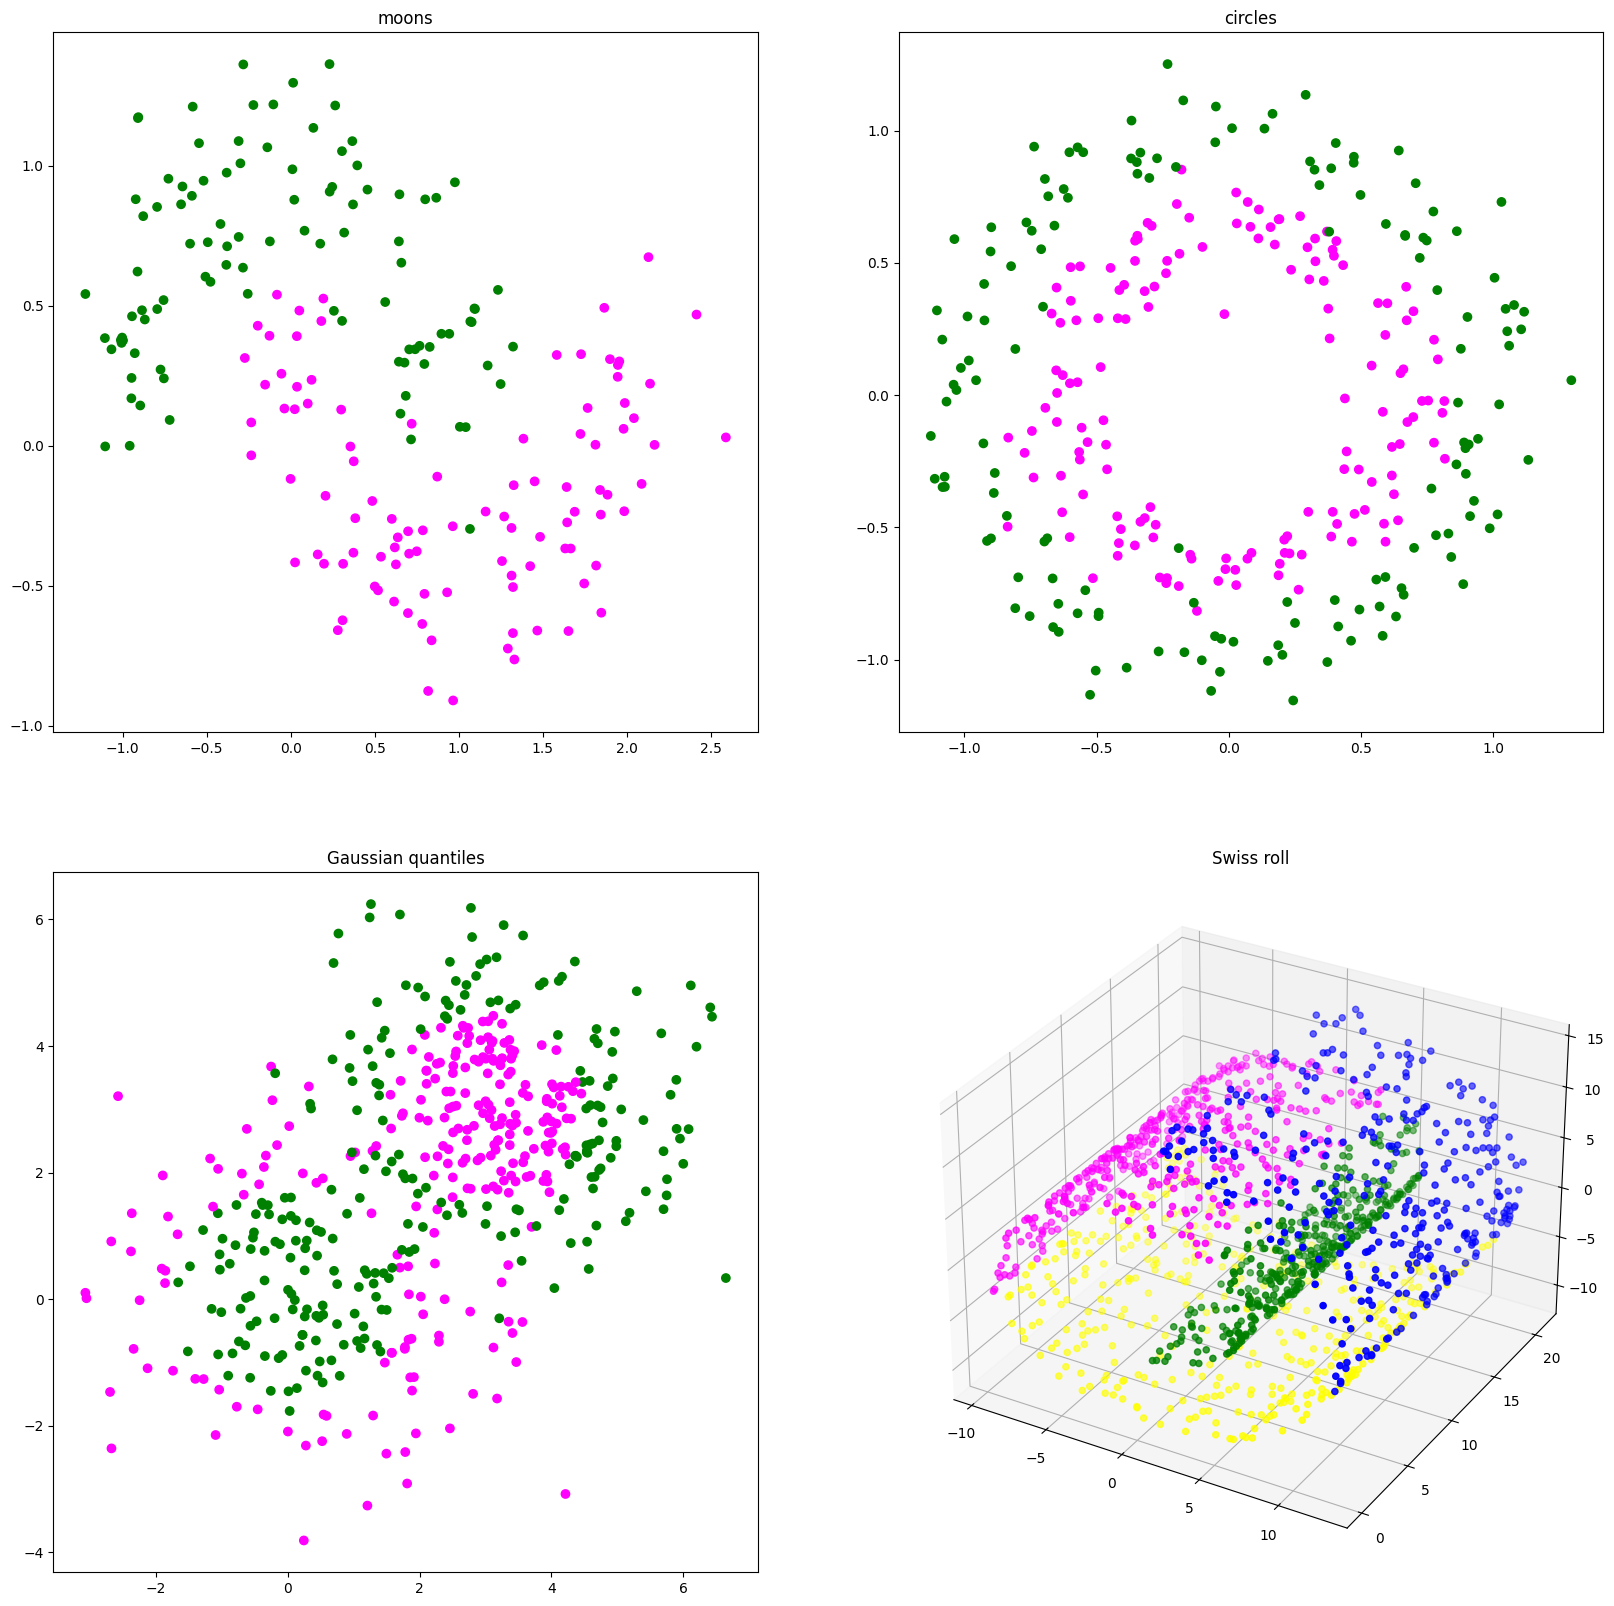

In [16]:
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles, make_swiss_roll
from math import floor, ceil
import mpl_toolkits.mplot3d.axes3d as p3

colors = ListedColormap(['green', 'magenta', 'yellow', 'blue'])

X_moons, y_moons = make_moons(n_samples=200, noise = .2, random_state = 504)
X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .1)
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=504)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=504)
X_quan = np.concatenate((X1, X2))
y_quan = np.concatenate((y1, - y2 + 1))

X_swiss, y_swiss = make_swiss_roll(n_samples = 1500, noise = 0.05, random_state=504)

y_min = y_swiss.min()
y_max = y_swiss.max()
y_scale = ceil(y_max - y_min)

y_swiss = np.array([floor(4 * (y - y_min) / y_scale) for y in y_swiss])

figure = plt.figure(figsize=(20, 20))

ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=y_quan, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=y_swiss, cmap=colors)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=504)
svm_class = SVC(probability=True, decision_function_shape='ovr', kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.8333333333333334, 0.84)

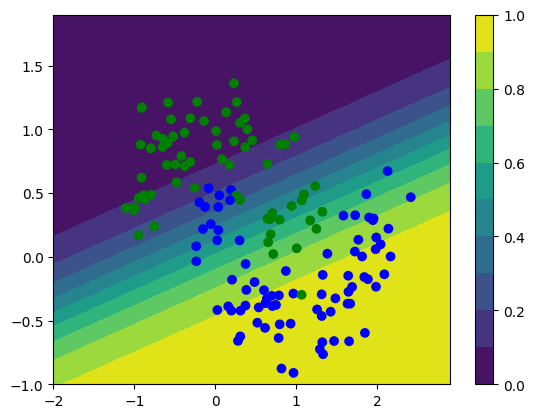

In [18]:
plot_probabilities(svm_class, X_train, y_train, colors)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, random_state=504)
svm_class = SVC(probability=True, decision_function_shape='ovr', kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.5422222222222223, 0.37333333333333335)

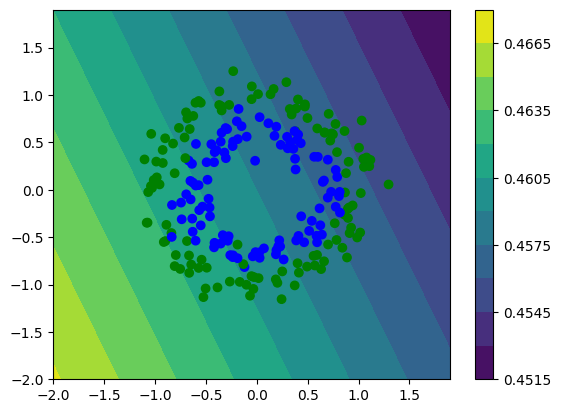

In [20]:
plot_probabilities(svm_class, X_train, y_train, colors)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_quan, y_quan, random_state=504)
svm_class = SVC(probability=True, decision_function_shape='ovr', kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.672, 0.6)

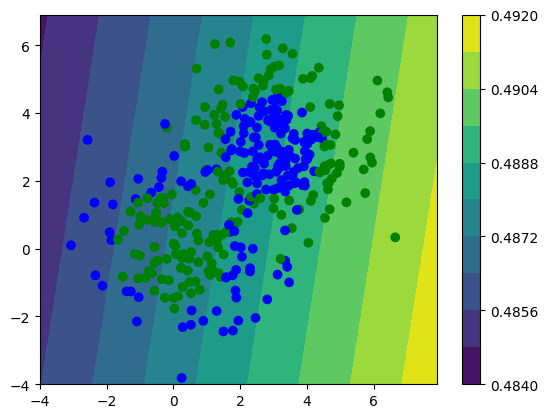

In [22]:
plot_probabilities(svm_class, X_train, y_train, colors)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_swiss, y_swiss, random_state=504)
svm_class = SVC(probability=True, decision_function_shape='ovr', kernel='linear', random_state=504)
svm_class.fit(X_train, y_train)

svm_class.score(X_train, y_train), svm_class.score(X_test, y_test)

(0.9564444444444444, 0.976)